In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA




In [3]:
# Load dataset
df = pd.read_csv('fake_job_postings.csv')

# Display basic info
print("Dataset Overview:")
df = df.dropna()
print(df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 6 to 17865
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               774 non-null    int64 
 1   title                774 non-null    object
 2   location             774 non-null    object
 3   department           774 non-null    object
 4   salary_range         774 non-null    object
 5   company_profile      774 non-null    object
 6   description          774 non-null    object
 7   requirements         774 non-null    object
 8   benefits             774 non-null    object
 9   telecommuting        774 non-null    int64 
 10  has_company_logo     774 non-null    int64 
 11  has_questions        774 non-null    int64 
 12  employment_type      774 non-null    object
 13  required_experience  774 non-null    object
 14  required_education   774 non-null    object
 15  industry             774 non-null    objec

In [4]:
df.head()
df.to_csv("res_data.csv")


Class Distribution:
fraudulent
0    702
1     72
Name: count, dtype: int64


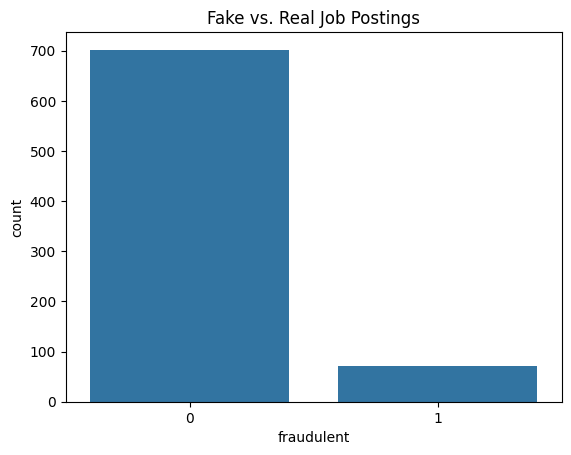

In [5]:
# Display class distribution
if 'fraudulent' in df.columns:
    print("\nClass Distribution:")
    print(df['fraudulent'].value_counts())
    
    # Visualizing class distribution
    sns.countplot(x=df['fraudulent'])
    plt.title('Fake vs. Real Job Postings')
    plt.show()

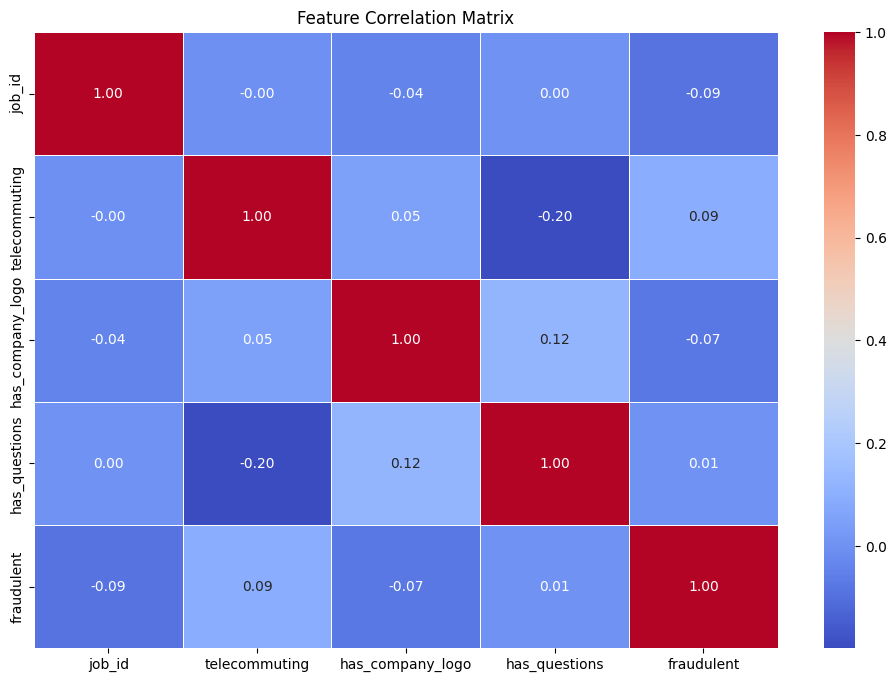

In [6]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


In [7]:
X = df.drop(columns=['fraudulent'])
y = df['fraudulent']


In [8]:
X = pd.get_dummies(X, drop_first=True)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Supervised Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       142
           1       1.00      0.92      0.96        13

    accuracy                           0.99       155
   macro avg       1.00      0.96      0.98       155
weighted avg       0.99      0.99      0.99       155



In [11]:
# Supervised Model 2: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       142
           1       1.00      0.92      0.96        13

    accuracy                           0.99       155
   macro avg       1.00      0.96      0.98       155
weighted avg       0.99      0.99      0.99       155



/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


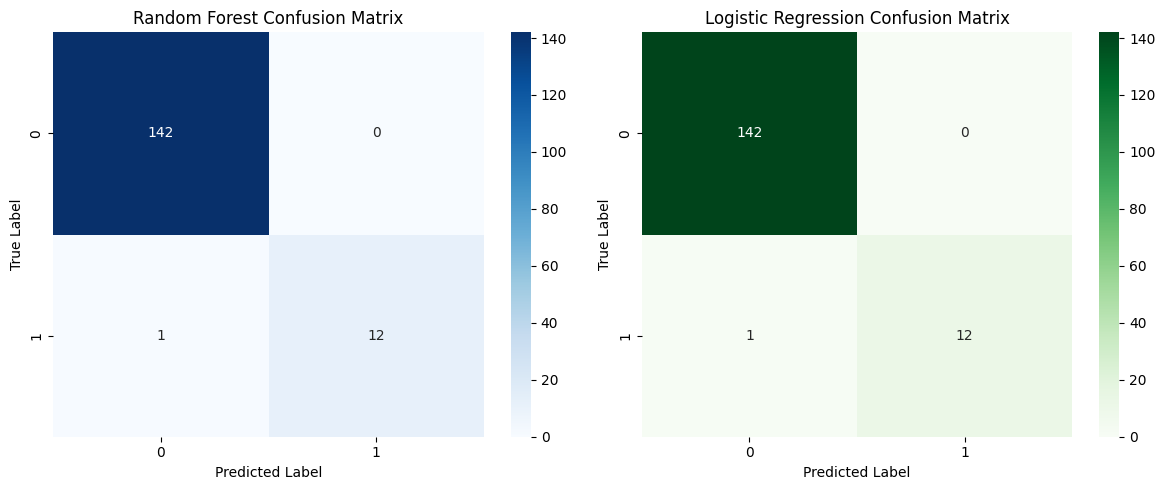

In [12]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Logistic Regression Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


In [13]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
kmeans_labels = kmeans.predict(X_test)
print("K-Means Clustering Report:")
print(classification_report(y_test, kmeans_labels))


K-Means Clustering Report:
              precision    recall  f1-score   support

           0       0.88      0.50      0.64       142
           1       0.04      0.23      0.07        13

    accuracy                           0.48       155
   macro avg       0.46      0.37      0.35       155
weighted avg       0.81      0.48      0.59       155



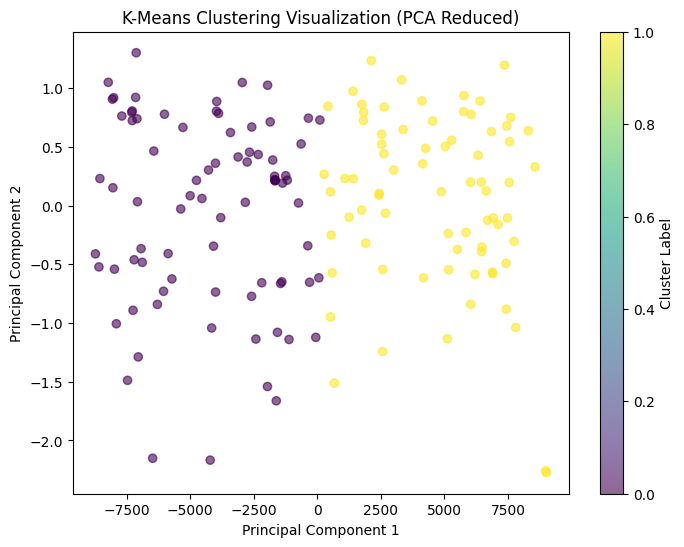

In [14]:
# Clustering Visualization using PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()